# Read CESM FOSI file of FEISTY inputs

In [1]:
clear all
close all

Cdir = '/glade/u/home/cpetrik/fish-offline/MatFEISTY/input_files/';

### Rename so not overwritten. Convert to doubles and use NaNs

In [14]:
% Load
load([Cdir 'g.e11_LENS.GECOIAF.T62_g16.009.FIESTY-forcing.mat'],...
    'TEMP_150m','TEMP_bottom','POC_FLUX_IN_bottom','TLAT','TLONG','TAREA','time');
load([Cdir 'g.e11_LENS.GECOIAF.T62_g16.009.meszoo_totloss_allphytoC.mat'],...
    'LzooC_150m','Lzoo_loss_150m');

% Doubles and nans
POC_FLUX_IN_bottom(POC_FLUX_IN_bottom >= 9.9e+36) = nan;
LzooC_150m(LzooC_150m >= 9.9e+36) = nan;
Lzoo_loss_150m(Lzoo_loss_150m >= 9.9e+36) = nan;

fosi_Tp = double(TEMP_150m); 
fosi_Tb = double(TEMP_bottom); 
fosi_POC = double(POC_FLUX_IN_bottom); 
fosi_zooC = double(LzooC_150m); 
fosi_loss = double(Lzoo_loss_150m); 
fosi_time = double(time);

In [15]:
clear TEMP_150m TEMP_bottom POC_FLUX_IN_bottom time LzooC_150m Lzoo_loss_150m

### Just DPLE years 1954-2018

In [16]:
% FOSI is 1948-2015
% DPLE is 1954-2017
%leadtimes = 1:24;
firstyear = 1954; %of DPLE initializations
lastyear  = 2015; %of DPLE initializations
startmonth = 11;

%dple_year = 1954:2017; not needed, in vector Y

%fosi_date = (1948+(1/12)):(1/12):2016;

f1 = datetime(1948,1,1,0,0,0);
f2 = datetime(2015,12,1,0,0,0);
ft = f1:calmonths(1):f2;
fosi_date = ft;

whos fosi_date
fosi_date(1)
fosi_date(end)

  Name           Size             Bytes  Class       Attributes

  fosi_date      1x816             6529  datetime              


ans = 

  datetime

   01-Jan-1948 00:00:00


ans = 

  datetime

   01-Dec-2015 00:00:00



### Calc climatology of FOSI for adding to DPLE anomalies

In [17]:
%% Monthly clim
[ni,nj,nmo] = size(fosi_Tp);
nyr = nmo/12;

clim_Tp = nan*ones(ni,nj,12);
clim_Tb = nan*ones(ni,nj,12);
clim_POC = nan*ones(ni,nj,12);
clim_zooC = nan*ones(ni,nj,12);
clim_loss = nan*ones(ni,nj,12);
for m = 1:12
    mo = m:12:nyr;
    clim_Tp(:,:,m) = nanmean(double(fosi_Tp(:,:,mo)),3);
    clim_Tb(:,:,m) = nanmean(double(fosi_Tb(:,:,mo)),3);
    clim_POC(:,:,m) = nanmean(double(fosi_POC(:,:,mo)),3);
    clim_zooC(:,:,m) = nanmean(double(fosi_zooC(:,:,mo)),3);
    clim_loss(:,:,m) = nanmean(double(fosi_loss(:,:,mo)),3);
end

%% Repeat climatol for 10 yrs
clim_Tp = repmat(clim_Tp,1,1,10);
clim_Tb = repmat(clim_Tb,1,1,10);
clim_POC = repmat(clim_POC,1,1,10);
clim_zooC = repmat(clim_zooC,1,1,10);
clim_loss = repmat(clim_loss,1,1,10);

whos clim_POC %fosi_POC

  Name            Size                     Bytes  Class     Attributes

  clim_POC      320x384x120            117964800  double              



In [20]:
%% Add Nov & Dec to beginning
Tp_ND = cat(3,clim_Tp(:,:,11),clim_Tp(:,:,12));
Tb_ND = cat(3,clim_Tb(:,:,11),clim_Tb(:,:,12));
POC_ND = cat(3,clim_POC(:,:,11),clim_POC(:,:,12));
zoo_ND = cat(3,clim_zooC(:,:,11),clim_zooC(:,:,12));
loss_ND = cat(3,clim_loss(:,:,11),clim_loss(:,:,12));

clim_Tp = cat(3,Tp_ND,clim_Tp);
clim_Tb = cat(3,Tb_ND,clim_Tb);
clim_POC = cat(3,POC_ND,clim_POC);
clim_zooC = cat(3,zoo_ND,clim_zooC);
clim_loss = cat(3,loss_ND,clim_loss);

whos clim_POC

  Name            Size                     Bytes  Class     Attributes

  clim_POC      320x384x122            119930880  double              



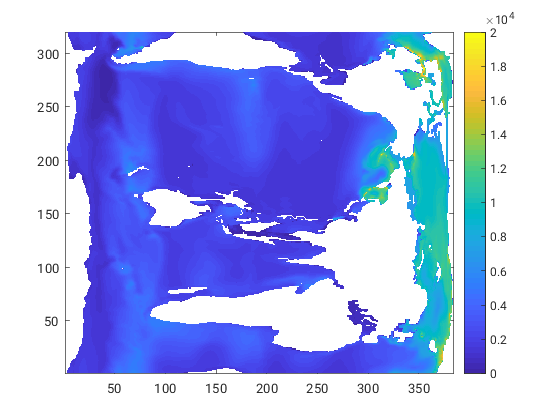

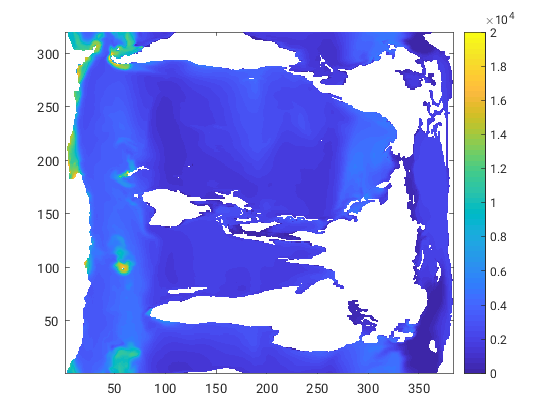

In [21]:
%% Check climatol
%figure
%pcolor(squeeze(clim_zooC(:,:,3))); shading flat; colorbar;
%caxis([0 2e4])
%figure
%pcolor(squeeze(clim_zooC(:,:,9))); shading flat; colorbar;
%caxis([0 2e4])

figure
pcolor(squeeze(clim_zooC(:,:,17))); shading flat; colorbar;
caxis([0 2e4])
figure
pcolor(squeeze(clim_zooC(:,:,23))); shading flat; colorbar;
caxis([0 2e4])

clear fosi_Tp fosi_Tb fosi_POC fosi_zooC fosi_loss

# Read CESM DPLE netcdfs

In [5]:
fpath='/glade/scratch/kristenk/fish-offline/';

### Display netcdf contents for zooC as example

In [6]:
ncdisp([fpath 'DPLE-FIESTY-forcing_zooC_150m.nc'])

Source:
           /glade/scratch/kristenk/fish-offline/DPLE-FIESTY-forcing_zooC_150m.nc
Format:
           netcdf4
Dimensions:
           nlat = 384
           nlon = 320
           M    = 40
           L    = 122
           Y    = 64
Variables:
    TLONG    
           Size:       320x384
           Dimensions: nlon,nlat
           Datatype:   double
           Attributes:
                       _FillValue    = 9.969209968386869e+36
                       units         = 'degrees_east'
                       long_name     = 'array of t-grid longitudes'
                       missing_value = 9.969209968386869e+36
    TLAT     
           Size:       320x384
           Dimensions: nlon,nlat
           Datatype:   double
           Attributes:
                       _FillValue    = 9.969209968386869e+36
                       units         = 'degrees_north'
                       long_name     = 'array of t-grid latitudes'
                       missing_value = 9.969209968386869e+36
   

## Loop over initialization years

In [7]:
% Pelagic temperature
ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_TEMP_150m.nc'],'NC_NOWRITE');
[ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
for i = 1:(nvars-1)
    varname = netcdf.inqVar(ncid, i-1);
    eval([ varname ' = netcdf.getVar(ncid,i-1);']);
    eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
end
[ni,nj] = size(TLONG);
whos M L Y

% TIME PERIOD FOR INTERPOLATION
mos = length(L);
mstart = 3:12:mos; %starts at Nov
mend = 14:12:mos;  %ends at Dec
mstart = [1 mstart];
mend = [2 mend];
nyrs = ceil(mos/12);
simy = 1:nyrs;

Tdays=1:365;

% LOAD GRIDDATA 
load([Cdir 'gridspec_POP_gx1v6_noSeas.mat'],'mask');

spath = '/glade/scratch/cpetrik/fish-offline/dailies/';


  Name        Size            Bytes  Class    Attributes

  L         122x1               976  int64              
  M          40x1               320  int64              
  Y          64x1               512  int64              



### Loop over ensemble members

### Read one forecast for one ensemble member for the first lead year of temp and det

In [19]:
for yr=1%:length(Y); %Y(62)
    for mem=1%:length(M);
        im = M(mem);
        iy = yr; 

        % READ IN ENSEMBLE MEMBER
        % Pelagic temperature
        ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_TEMP_150m.nc'],'NC_NOWRITE');
        [ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
        for n = nvars
            varname = netcdf.inqVar(ncid, n-1);
            eval([ varname ' = netcdf.getVar(ncid,n-1, [0,0,0,im-1,yr-1],[ni,nj,length(L),1,1]);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        netcdf.close(ncid);

        % Bottom temperature
        ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_TEMP_bottom.nc'],'NC_NOWRITE');
        [ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
        for i = 1:(nvars-1)
            varname = netcdf.inqVar(ncid, i-1);
            eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        [ni,nj] = size(TLONG);
        for n = nvars
            varname = netcdf.inqVar(ncid, n-1);
            eval([ varname ' = netcdf.getVar(ncid,n-1, [0,0,0,im-1,yr-1],[ni,nj,length(L),1,1]);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        netcdf.close(ncid);

        %Bottom detritus
        ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_POC_FLUX_IN_bottom.nc'],'NC_NOWRITE');
        [ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
        for i = 1:(nvars-1)
            varname = netcdf.inqVar(ncid, i-1);
            eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        [ni,nj] = size(TLONG);
        for n = nvars
            varname = netcdf.inqVar(ncid, n-1);
            eval([ varname ' = netcdf.getVar(ncid,n-1, [0,0,0,im-1,yr-1],[ni,nj,length(L),1,1]);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        netcdf.close(ncid);

        %spC  
        ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_spC_150m.nc'],'NC_NOWRITE');
        [ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
        for i = 1:(nvars-1)
            varname = netcdf.inqVar(ncid, i-1);
            eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        [ni,nj] = size(TLONG);
        for n = nvars
            varname = netcdf.inqVar(ncid, n-1);
            eval([ varname ' = netcdf.getVar(ncid,n-1, [0,0,0,im-1,yr-1],[ni,nj,length(L),1,1]);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        netcdf.close(ncid);

        %diatC
        ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_diatC_150m.nc'],'NC_NOWRITE');
        [ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
        for i = 1:(nvars-1)
            varname = netcdf.inqVar(ncid, i-1);
            eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        for n = nvars
            varname = netcdf.inqVar(ncid, n-1);
            eval([ varname ' = netcdf.getVar(ncid,n-1,[0,0,0,im-1,yr-1],[ni,nj,length(L),1,1]);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        netcdf.close(ncid);

        %diazC
        ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_diazC_150m.nc'],'NC_NOWRITE');
        [ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
        for i = 1:(nvars-1)
            varname = netcdf.inqVar(ncid, i-1);
            eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        for n = nvars
            varname = netcdf.inqVar(ncid, n-1);
            eval([ varname ' = netcdf.getVar(ncid,n-1,[0,0,0,im-1,yr-1],[ni,nj,length(L),1,1]);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        netcdf.close(ncid);

        % Zooplankton
        ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_zooC_150m.nc'],'NC_NOWRITE');
        [ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
        for i = 1:(nvars-1)
            varname = netcdf.inqVar(ncid, i-1);
            eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        for n = nvars
            varname = netcdf.inqVar(ncid, n-1);
            %eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            %zmeso = netcdf.getVar(ncid,n-1, [0,0,0,runs(1)-1],[360 180 length(z200) length(runs)]);
            eval([ varname ' = netcdf.getVar(ncid,n-1,[0,0,0,im-1,yr-1],[ni,nj,length(L),1,1]);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        netcdf.close(ncid);

        % ZooLoss
        ncid = netcdf.open([fpath 'DPLE-FIESTY-forcing_zoo_loss_150m.nc'],'NC_NOWRITE');
        [ndims,nvars,ngatts,unlimdimid] = netcdf.inq(ncid);
        for i = 1:(nvars-1)
            varname = netcdf.inqVar(ncid, i-1);
            eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        for n = nvars
            varname = netcdf.inqVar(ncid, n-1);
            %eval([ varname ' = netcdf.getVar(ncid,i-1);']);
            %zmeso = netcdf.getVar(ncid,n-1, [0,0,0,runs(1)-1],[360 180 length(z200) length(runs)]);
            eval([ varname ' = netcdf.getVar(ncid,n-1,[0,0,0,im-1,yr-1],[ni,nj,length(L),1,1]);']);
            eval([ varname '(' varname ' == 9.969209968386869e+36) = NaN;']);
        end
        netcdf.close(ncid);

        % Doubles and nans
        TEMP_150m = double(TEMP_150m); 
        TEMP_bottom = double(TEMP_bottom); 
        POC_FLUX_IN_bottom = double(POC_FLUX_IN_bottom); 
        zooC_150m = double(zooC_150m); 
        zoo_loss_150m = double(zoo_loss_150m); 
        diatC_150m = double(diatC_150m);
        diazC_150m = double(diazC_150m);
        spC_150m = double(spC_150m); 

        POC_FLUX_IN_bottom(POC_FLUX_IN_bottom >= 9.9e+36) = nan;
        zooC_150m(zooC_150m >= 9.9e+36) = nan;
        zoo_loss_150m(zoo_loss_150m >= 9.9e+36) = nan;


        % CALC LARGE FRACTION OF ZOOP FROM ALL PHYTO
        fracL = diatC_150m ./ (diatC_150m + spC_150m + diazC_150m);
        LzooC_150m = fracL .* zooC_150m;
        Lzoo_loss_150m = fracL .* zoo_loss_150m;

        clear diatC_150m spC_150m zooC_150m zoo_loss_150m diazC_150m
        
        end %loop over M members
end %loop over Y years
        
    

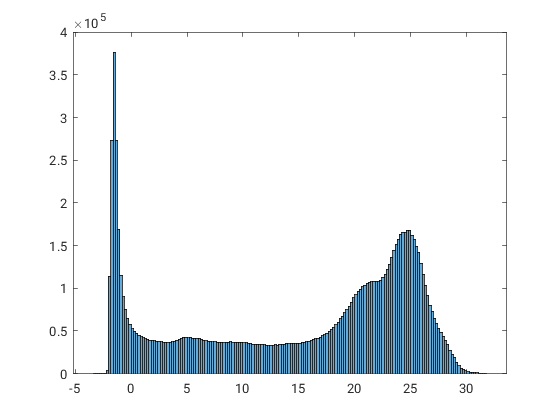

In [22]:
% ADD TO FOSI CLIMATOL

        % ADD DPLE DRIFT-CORR ANOMALIES TO FOSI VALUES
        %fosi_Tp fosi_Tb fosi_POC fosi_zooC fosi_loss
        TEMP_150m = TEMP_150m + clim_Tp; 
        TEMP_bottom = TEMP_bottom + clim_Tb; 
        POC_FLUX_IN_bottom = POC_FLUX_IN_bottom + clim_POC; 
        LzooC_150m = LzooC_150m + clim_zooC;
        Lzoo_loss_150m = Lzoo_loss_150m + clim_loss;

        POC_FLUX_IN_bottom(POC_FLUX_IN_bottom<0) = 0.0;
        LzooC_150m(LzooC_150m<0) = 0.0;
        Lzoo_loss_150m(Lzoo_loss_150m<0) = 0.0;
        
histogram(TEMP_150m)
        

In [23]:
nyrs


nyrs =

    11



In [24]:
% DAILY INTERPOLATION, INCLUDES UNIT CONVERSION
        for y = 1:nyrs
            lyr = simy(y);
            ['Y',num2str(Y(iy)),'_M',num2str(im),'_LY',num2str(lyr)]

            % 1ST MONTH IS NOV, NEED TO ADJUST!

            if y==1
                range = mstart(y):(mend(y)+1);
                Time=315:30:395;
            elseif y==nyrs
                range = (mstart(y)-1):mend(y);
                Time=-15:30:365;
            else
                range = (mstart(y)-1):(mend(y)+1);
                Time=-15:30:395;
            end

            % months of interest
            Tp  = (TEMP_150m(:,:,range));
            Tb  = (TEMP_bottom(:,:,range));
            Zm  = (LzooC_150m(:,:,range));
            dZm = (Lzoo_loss_150m(:,:,range));
            det = (POC_FLUX_IN_bottom(:,:,range));

            % index of water cells
            [ni,nj,nt] = size(LzooC_150m);
            WID = find(~isnan(LzooC_150m(:,:,1)));    % spatial index of water cells excludes interior seas
            NID = length(WID);         % number of water cells

            % setup FEISTY data files
            D_Tp  = nan*zeros(NID,365);
            D_Tb  = nan*zeros(NID,365);
            D_Zm  = nan*zeros(NID,365);
            D_dZm = nan*zeros(NID,365);
            D_det = nan*zeros(NID,365);

            %% interpolate to daily resolution
            for j = 1:NID
                % indexes
                [m,n] = ind2sub([ni,nj],WID(j)); % spatial index of water cell

                % pelagic temperature (in Celcius)
                X = squeeze(Tp(m,n,:));
                tp = interp1(Time, X, Tdays,'linear','extrap');
                D_Tp(j,:) = tp;

                % bottom temperature (in Celcius)
                X = squeeze(Tb(m,n,:));
                tb = interp1(Time, X, Tdays,'linear','extrap');
                D_Tb(j,:) = tb;

                % meso zoo: nmolC cm-2 to g(WW) m-2
                % 1e9 nmol in 1 mol C
                % 1e4 cm2 in 1 m2
                % 12.01 g C in 1 mol C
                % 1 g dry W in 9 g wet W (Pauly & Christiansen)
                X = squeeze(Zm(m,n,:));
                mz = interp1(Time, X, Tdays,'linear','extrap');
                D_Zm(j,:) = mz * 1e-9 * 1e4 * 12.01 * 9.0;

                % meso zoo mortality: nmolC cm-2 s-1 to g(WW) m-2 d-1
                % 1e9 nmol in 1 mol C
                % 1e4 cm2 in 1 m2
                % 12.01 g C in 1 mol C
                % 1 g dry W in 9 g wet W (Pauly & Christiansen)
                X = squeeze(dZm(m,n,:));
                zl = interp1(Time, X, Tdays,'linear','extrap');
                D_dZm(j,:) = zl * 1e-9 * 1e4 * 12.01 * 9.0 * 60 * 60 * 24;

                % detrital flux to benthos: nmolC cm-2 s-1 to g(WW) m-2 d-1
                % 1e9 nmol in 1 mol C
                % 1e4 cm2 in 1 m2
                % 12.01 g C in 1 mol C
                % 1 g dry W in 9 g wet W (Pauly & Christiansen)
                X = squeeze(det(m,n,:));
                de = interp1(Time, X, Tdays,'linear','extrap');
                D_det(j,:) = de * 1e-9 * 1e4 * 12.01 * 9.0 * 60 * 60 * 24;       
            end %grid cells

            % Negative biomass or mortality loss from interp
            D_Zm(D_Zm<0) = 0.0;
            D_dZm(D_dZm<0) = 0.0;
            D_det(D_det<0) = 0.0;

            D_Zm(isnan(D_Zm)) = 0.0;
            D_dZm(isnan(D_dZm)) = 0.0;
            D_det(isnan(D_det)) = 0.0;

            ESM.Tp = D_Tp;
            ESM.Tb = D_Tb;
            ESM.Zm = D_Zm;
            ESM.dZm = D_dZm;
            ESM.det = D_det;

            % save
            save([spath 'Data_cesm_dple_daily_Y',num2str(Y(iy)),'_M',num2str(im),'_LY',num2str(lyr),'.mat'], 'ESM');   

        end %sim year L lead year


ans =

    'Y1954_M1_LY1'


ans =

    'Y1954_M1_LY2'


ans =

    'Y1954_M1_LY3'


ans =

    'Y1954_M1_LY4'


ans =

    'Y1954_M1_LY5'


ans =

    'Y1954_M1_LY6'


ans =

    'Y1954_M1_LY7'


ans =

    'Y1954_M1_LY8'


ans =

    'Y1954_M1_LY9'


ans =

    'Y1954_M1_LY10'


ans =

    'Y1954_M1_LY11'



  Name           Size                 Bytes  Class     Attributes

  D_Tb       85813x365            250573960  double              
  D_Tp       85813x365            250573960  double              
  D_Zm       85813x365            250573960  double              
  D_dZm      85813x365            250573960  double              
  D_det      85813x365            250573960  double              
  X             13x1                    104  double              
  de             1x365                 2920  double              



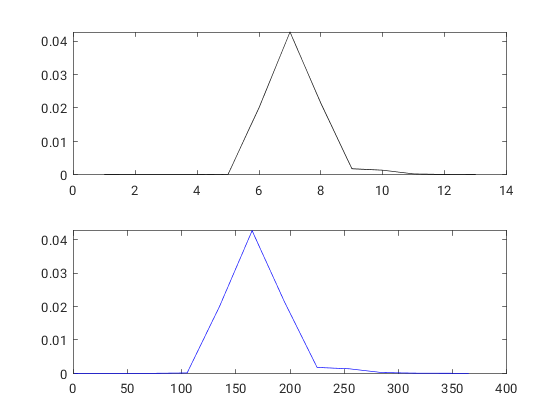

In [26]:
whos D_Tp D_Tb D_det D_Zm D_dZm X de

figure
subplot(2,1,1)
plot(1:13, X,'k')
subplot(2,1,2)
plot(1:365,de,'b')


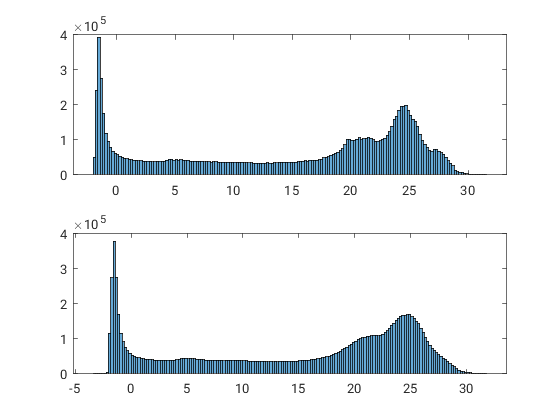

In [27]:
figure(2)
subplot(2,1,1)
histogram(clim_Tp(:))
subplot(2,1,2)
histogram(TEMP_150m(:))

In [28]:
[spath 'Data_cesm_dple_daily_Y',num2str(Y(iy)),'_M',num2str(im),'_LY',num2str(lyr),'.mat']


ans =

    '/glade/scratch/cpetrik/fish-offline/dailies/Data_cesm_dple_daily_Y1954_M1_LY11.mat'



In [29]:
['Y',num2str(Y(iy)),'_M',num2str(im),'_LY',num2str(lyr)]


ans =

    'Y1954_M1_LY11'

